In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [2]:
def calculate_ndvi(red_band_path, nir_band_path, output_ndvi_path):
    # Lecture des bandes B3 (Rouge) et B4 (Infrarouge)
    with rasterio.open(red_band_path) as red_src:
        red = red_src.read(1).astype('float32')
    
    with rasterio.open(nir_band_path) as nir_src:
        nir = nir_src.read(1).astype('float32')

    # Calcul du NDVI
    ndvi = (nir - red) / (nir + red)
    
    # Remplacer les pixels où NDVI = 0 par -2 (hors plage)
    ndvi[np.isnan(ndvi)] = -2
    ndvi[ndvi == 0] = -2
    
    # Affichage du NDVI
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar()
    plt.title('NDVI')
    plt.show()

    # Sauvegarde de l'image NDVI en GeoTIFF
    with rasterio.open(
        output_ndvi_path, 
        'w', 
        driver='GTiff', 
        height=red.shape[0],
        width=red.shape[1],
        count=1,
        dtype='float32',
        crs=red_src.crs,
        transform=red_src.transform
    ) as dst:
        dst.write(ndvi, 1)

    print(f"NDVI sauvegardé dans {output_ndvi_path}")

C:\Users\billo\AppData\Local\Temp\ipykernel_13616\4008736138.py:10: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


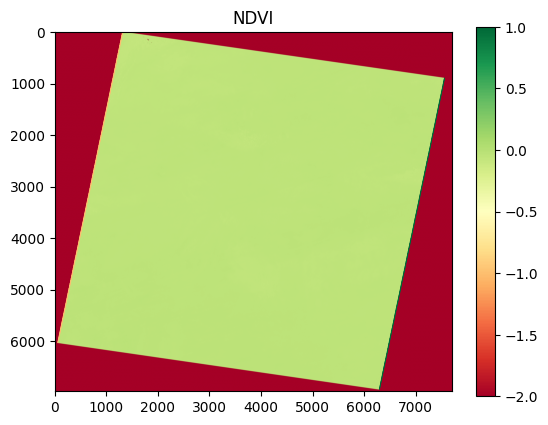

NDVI sauvegardé dans ../ndvi/ndvi_sans_zones_noires/output_ndvi_sans_zones_noires.TIF


In [3]:
if __name__ == "__main__":
    calculate_ndvi('../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B3.TIF', '../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B4.TIF', '../ndvi/ndvi_sans_zones_noires/output_ndvi_sans_zones_noires.TIF')